# Load the data

## Import Libraries

In [2]:
import pandas
import numpy
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import time
from sklearn import metrics, grid_search
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from operator import itemgetter
from sklearn.svm import SVC
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
# fix random seed for reproducibility
plt.rcParams['figure.figsize'] = (20, 10)

 ## Load Datasets

In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
names = ['sequential number', 'x acceleration', 'y acceleration', 'z acceleration', 'label']
#names = ['age','sex','pain','BP','chol','fbs','ecg','maxhr','eiang','eist','slope','vessels','thal','diagnosis']
url1 = "./data/1.csv"
url2 = "./data/2.csv"
url3 = "./data/3.csv"
url4 = "./data/4.csv"
url5 = "./data/5.csv"
url6 = "./data/6.csv"
url7 = "./data/7.csv"
url8 = "./data/8.csv"
url9 = "./data/9.csv"
url10 = "./data/10.csv"
url11 = "./data/11.csv"
url12 = "./data/12.csv"
url13 = "./data/13.csv"
url14 = "./data/14.csv"
url15 = "./data/15.csv"

data1 = pandas.read_csv(url1, index_col=False, names=names )
data2 = pandas.read_csv(url2, index_col=False, names=names)
data3 = pandas.read_csv(url3, index_col=False, names=names)
data4 = pandas.read_csv(url4, index_col=False, names=names)
data5 = pandas.read_csv(url5, index_col=False, names=names)
data6 = pandas.read_csv(url6, index_col=False, names=names)
data7 = pandas.read_csv(url7, index_col=False, names=names)
data8 = pandas.read_csv(url8, index_col=False, names=names)
data9 = pandas.read_csv(url9, index_col=False, names=names)
data10 = pandas.read_csv(url10, index_col=False, names=names)
data11 = pandas.read_csv(url11, index_col=False, names=names)
data12 = pandas.read_csv(url12, index_col=False, names=names)
data13 = pandas.read_csv(url13, index_col=False, names=names)
data14 = pandas.read_csv(url14, index_col=False, names=names)
data15 = pandas.read_csv(url15, index_col=False, names=names)

In [4]:
# frames = [data1]
frames = [data1, data2, data3, data4, data5, data6, data7,
          data8, data9, data10, data11, data12, data13, data14, data15]
data = pandas.concat(frames)
peek = data.head(5)
print(peek)

   sequential number  x acceleration  y acceleration  z acceleration  label
0                0.0            1502            2215            2153      1
1                1.0            1667            2072            2047      1
2                2.0            1611            1957            1906      1
3                3.0            1601            1939            1831      1
4                4.0            1643            1965            1879      1


In [5]:
data.head()

,sequential number,x acceleration,y acceleration,z acceleration,label
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [6]:
del data["sequential number"]

In [7]:
data.tail()

,x acceleration,y acceleration,z acceleration,label
103496,2043,2539,1990,7
103497,2036,2508,1976,7
103498,2025,2520,1991,7
103499,2009,2546,2007,7
103500,1999,2532,1996,0


In [8]:
#data = data.iloc[0:1000]

In [9]:
data = data.sample(n=1000)

In [10]:
shape = data.shape
print(shape)

(1000, 4)


In [11]:
types = data.dtypes
print(types)

x acceleration    int64
y acceleration    int64
z acceleration    int64
label             int64
dtype: object


In [12]:
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
description = data.describe()
print(description)

       x acceleration  y acceleration  z acceleration     label
count        1000.000        1000.000        1000.000  1000.000
mean         1981.528        2383.881        1970.521     3.927
std           108.827         102.009          87.516     2.440
min          1573.000        1847.000        1635.000     0.000
25%          1901.000        2337.000        1924.000     1.000
50%          1981.000        2366.000        1982.000     4.000
75%          2073.000        2413.000        2028.250     7.000
max          2261.000        2762.000        2222.000     7.000


In [13]:
class_counts = data.groupby('label').size()
print(class_counts)

label
0      7
1    296
2     26
3    122
4    184
5     27
6     24
7    314
dtype: int64


In [14]:
correlations = data.corr(method='pearson')
print(correlations)

                x acceleration  y acceleration  z acceleration  label
x acceleration           1.000           0.436           0.034  0.078
y acceleration           0.436           1.000           0.320  0.039
z acceleration           0.034           0.320           1.000 -0.021
label                    0.078           0.039          -0.021  1.000


In [15]:
skew = data.skew()
print(skew)

x acceleration   -0.173
y acceleration   -0.187
z acceleration   -0.648
label             0.085
dtype: float64


# Visulize the data

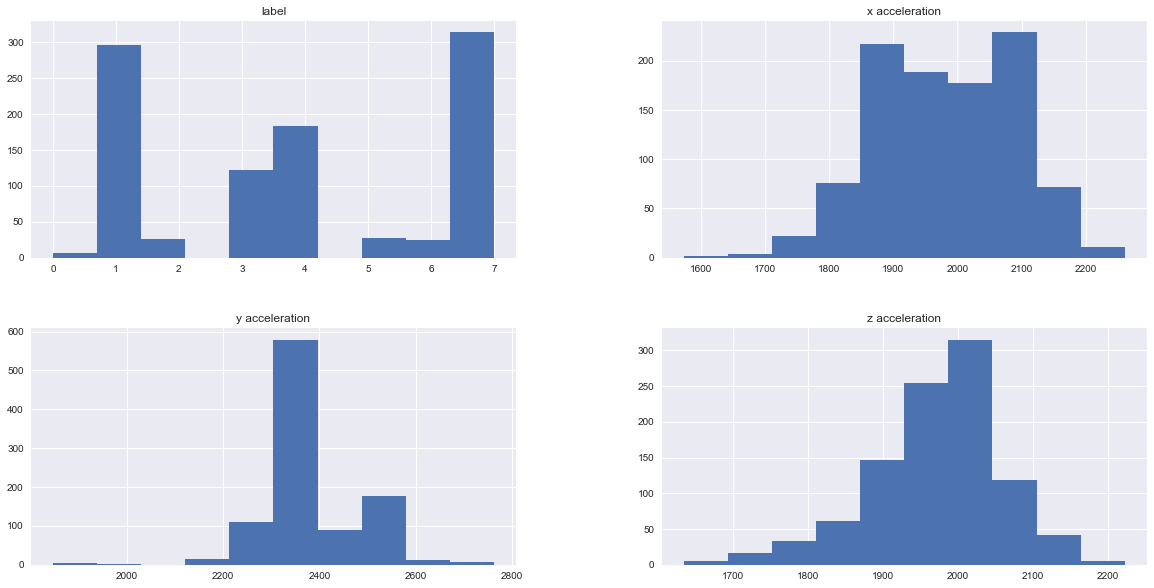

In [16]:
data.hist()
plt.show()

In [17]:
#data.plot(kind='density', subplots=True, sharex=False)
#plt.show()

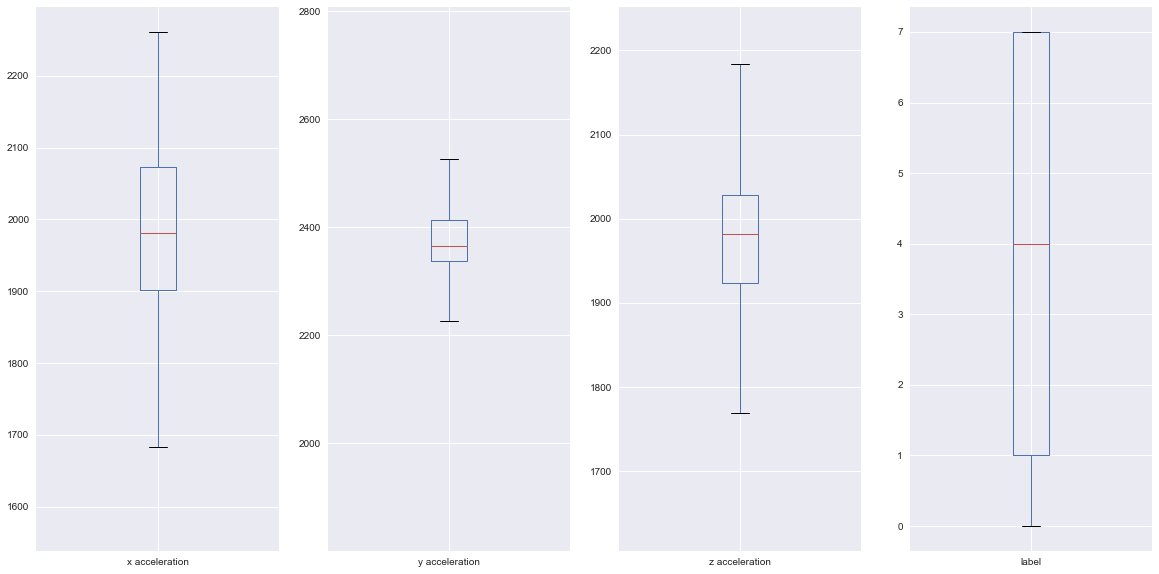

In [18]:
data.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

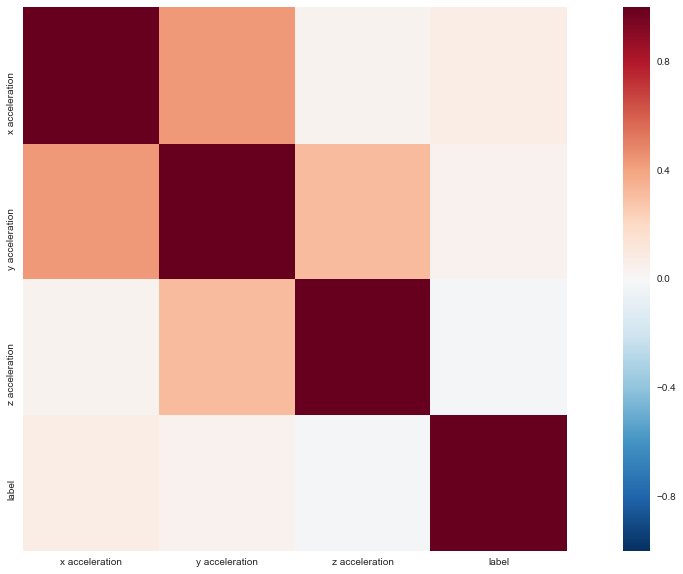

In [19]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(data)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

# Prepare the data for classification

In [20]:
from sklearn import preprocessing
dataset = data.values
X = dataset[:,0:3].astype(float)
Y = dataset[:,3]
features = preprocessing.scale(X)
target = Y

In [21]:
# Make developement dataset for genrilization and final testing
from sklearn.cross_validation import train_test_split
# Extracting 20% testing data
X_train_feature, X_deploy, y_train_feature, y_deploy = train_test_split(
    features, target, test_size=0.20, random_state=0)
# Make training and validation data sets for building the models and choose the hyperparameters
X_train, X_test, y_train, y_test = train_test_split(
    X_train_feature, y_train_feature, test_size=0.20, random_state=0)

print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))
print('Number of testing examples',len(X_deploy))

Number of training examples 640
Number of validation examples 160
Number of testing examples 200


# Feature Selection

In [22]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.33221882  0.32390059  0.34388059]


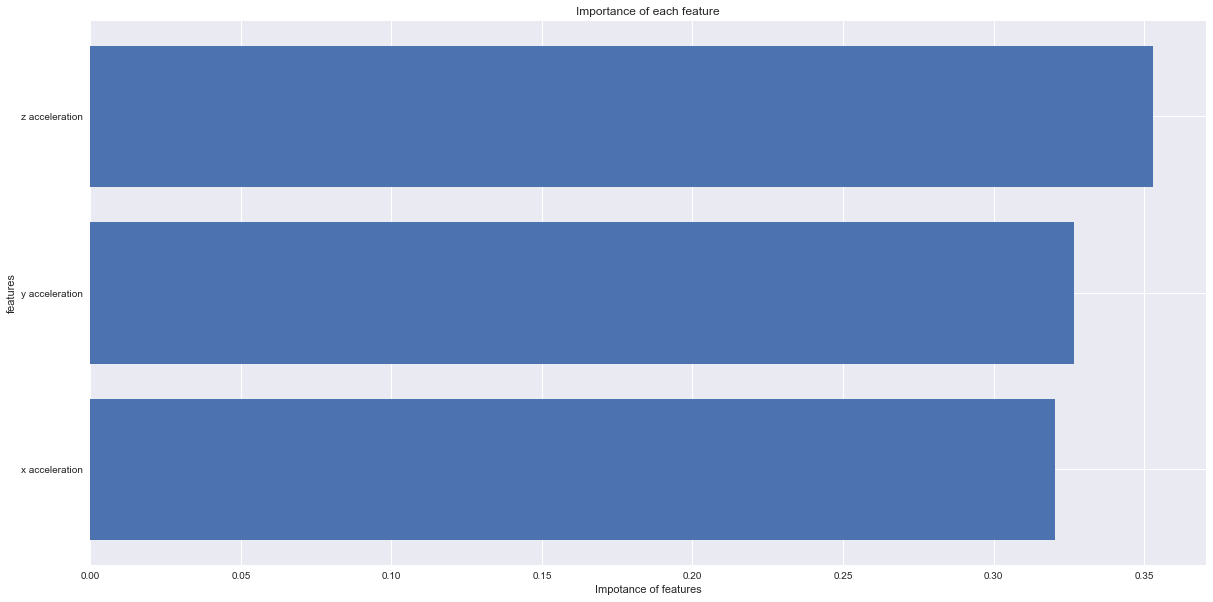

In [23]:
# importabt of features according to random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 15)
rf.fit(X, Y)
imp = rf.feature_importances_
names = data.columns

imp, names = zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Impotance of features')
plt.ylabel('features')
plt.title('Importance of each feature')
plt.show()

# Building classifiers

Function of printing best three models

In [24]:
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

## KNN classifier


### Seaching for the best hyperparameters 


In [25]:

from sklearn.neighbors import KNeighborsClassifier
parameters =  {'n_neighbors': [1,4,6,10], 'algorithm': ['auto','ball_tree','kd_tree','brute']}
knn = KNeighborsClassifier()
clf = grid_search.GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
report(clf.grid_scores_)

Model with rank: 1
Mean validation score: 0.583 (std: 0.016)
Parameters: {'algorithm': 'auto', 'n_neighbors': 1}

Model with rank: 2
Mean validation score: 0.583 (std: 0.016)
Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 1}

Model with rank: 3
Mean validation score: 0.583 (std: 0.016)
Parameters: {'algorithm': 'kd_tree', 'n_neighbors': 1}



### Classifier

In [26]:
clf_neigh = KNeighborsClassifier(algorithm='auto' , n_neighbors=6)
#Training
start_time = time.time()
clf_neigh.fit(X_train, y_train)
print("The time for training KNN is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_neigh.predict(X_test)

print("===================================================================")
print("The accuracy on validation dataset of KNN: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of KNN:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of KNN :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of KNN:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

The time for training KNN is  0.0012979507446289062 seconds 
The accuracy on validation dataset of KNN: 	 0.53125
Precision on validation dataset of KNN:    	 0.251712262695
Recall on validation dataset of KNN :      	 0.257057939825
F1 score on validation dataset of KNN:     	 0.246028001551
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.55      0.83      0.66        41
          2       0.00      0.00      0.00         4
          3       0.25      0.22      0.23        23
          4       0.58      0.32      0.42        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.64      0.69      0.66        51

avg / total       0.50      0.53      0.50       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM classifier
### Seaching for the best hyperparameters 


In [27]:
from sklearn import svm
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 20]}
parameters = [
  {'C': [1], 'kernel': ['linear']},
  {'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
 ]
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
report(clf.grid_scores_)

Model with rank: 1
Mean validation score: 0.450 (std: 0.011)
Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Model with rank: 2
Mean validation score: 0.373 (std: 0.014)
Parameters: {'C': 1, 'kernel': 'linear'}



In [28]:
clf_svm = SVC(C=10.0, gamma=0.001, kernel='rbf')
#Training
start_time = time.time()
clf_svm.fit(X_train, y_train)
print("The time for training SVM is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_svm.predict(X_test)

print("===================================================================")
print("The accuracy on validation dataset of SVM: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of SVM:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of SVM :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of SVM:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

The time for training SVM is  0.021797895431518555 seconds 
The accuracy on validation dataset of SVM: 	 0.275
Precision on validation dataset of SVM:    	 0.0685630637759
Recall on validation dataset of SVM :      	 0.119201339072
F1 score on validation dataset of SVM:     	 0.0870535714286
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.27      0.46      0.34        41
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00        23
          4       0.00      0.00      0.00        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.28      0.49      0.36        51

avg / total       0.16      0.28      0.20       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decsion Tree classifier
### Seaching for the best hyperparameters 


In [29]:
from sklearn import tree
parameters = {'criterion':('gini', 'entropy'),
              'min_samples_split': [ 2, 3, 4],
              'min_samples_leaf': [ 2, 3, 4]}

dt = tree.DecisionTreeClassifier()
clf = grid_search.GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)
report(clf.grid_scores_)

Model with rank: 1
Mean validation score: 0.545 (std: 0.045)
Parameters: {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.545 (std: 0.050)
Parameters: {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.544 (std: 0.049)
Parameters: {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 3}



### Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf_dt_IG = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=4)
#Training
start_time = time.time()
clf_dt_IG.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_IG.predict(X_test)

print("===================================================================")
print("The accuracy on validation dataset of DECISON TREE: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of DECISON TREE:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of DECSISON TREE :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of DECISION TREE:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

The time for training Decision Tree is  0.0032072067260742188 seconds 
The accuracy on validation dataset of DECISON TREE: 	 0.5125
Precision on validation dataset of DECISON TREE:    	 0.252270605212
Recall on validation dataset of DECSISON TREE :      	 0.259284095398
F1 score on validation dataset of DECISION TREE:     	 0.253361186014
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.61      0.80      0.69        41
          2       0.00      0.00      0.00         4
          3       0.36      0.35      0.36        23
          4       0.35      0.35      0.35        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.69      0.57      0.62        51

avg / total       0.50      0.51      0.50       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes methods

### Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
#Training
start_time = time.time()
clf_NB.fit(X_train, y_train)
print("The time for training Naive Bayes is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_NB.predict(X_test)

print("===================================================================")
print("The accuracy on validation dataset of NB: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of NB:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of NB :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of NB:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

The time for training Naive Bayes is  0.0013310909271240234 seconds 
The accuracy on validation dataset of NB: 	 0.4125
Precision on validation dataset of NB:    	 0.148263609547
Recall on validation dataset of NB :      	 0.174946197991
F1 score on validation dataset of NB:     	 0.134177847144
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.45      0.49      0.47        41
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00        23
          4       0.33      0.03      0.05        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.40      0.88      0.55        51

avg / total       0.31      0.41      0.31       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Linear Discriminant Analysis classifier
### Seaching for the best hyperparameters 

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
parameters = {'solver':('svd', 'lsqr')}

ld = LinearDiscriminantAnalysis()
clf = grid_search.GridSearchCV(ld, parameters)
clf.fit(X_train, y_train)
report(clf.grid_scores_)

Model with rank: 1
Mean validation score: 0.347 (std: 0.029)
Parameters: {'solver': 'svd'}

Model with rank: 2
Mean validation score: 0.347 (std: 0.029)
Parameters: {'solver': 'lsqr'}



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


### Classifier

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dt_LDA = LinearDiscriminantAnalysis()
#Training
start_time = time.time()
clf_dt_LDA.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_LDA.predict(X_test)

print("===================================================================")
print("The accuracy on validation dataset of LDA: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of LDA:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of LDA :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of LDA:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


The time for training Decision Tree is  0.0018620491027832031 seconds 
The accuracy on validation dataset of LDA: 	 0.3125
Precision on validation dataset of LDA:    	 0.0782350179941
Recall on validation dataset of LDA :      	 0.137494021999
F1 score on validation dataset of LDA:     	 0.0996078927397
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.32      0.61      0.42        41
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00        23
          4       0.00      0.00      0.00        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.30      0.49      0.37        51

avg / total       0.18      0.31      0.23       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Quadratic Discriminant Analysis classifier


### Classifier

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_dt_QDA = QuadraticDiscriminantAnalysis()
#Training
start_time = time.time()
clf_dt_QDA.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_QDA.predict(X_test)

print("===================================================================")
print("The accuracy on validation dataset of QDA: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of QDA:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of QDA :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of QDA:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

The time for training Decision Tree is  0.0018649101257324219 seconds 
The accuracy on validation dataset of QDA: 	 0.425
Precision on validation dataset of QDA:    	 0.147761121857
Recall on validation dataset of QDA :      	 0.184092539455
F1 score on validation dataset of QDA:     	 0.151543999599
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.49      0.56      0.52        41
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00        23
          4       0.27      0.09      0.13        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.42      0.82      0.56        51

avg / total       0.32      0.42      0.34       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=1e5)
#Training
start_time = time.time()
LogReg.fit(X_train, y_train)
print("The time for training LDA is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = LogReg.predict(X_test)



print("===================================================================")
print("The accuracy on validation dataset of LOG. REG.: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of LOG. REG.:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of LOG REG. :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of LOG. REG.:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

The time for training LDA is  0.00438690185546875 seconds 
The accuracy on validation dataset of LOG. REG.: 	 0.3125
Precision on validation dataset of LOG. REG.:    	 0.0781738586617
Recall on validation dataset of LOG REG. :      	 0.137494021999
F1 score on validation dataset of LOG. REG.:     	 0.0995134896064
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.32      0.61      0.42        41
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00        23
          4       0.00      0.00      0.00        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.30      0.49      0.38        51

avg / total       0.18      0.31      0.23       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Gaussian Process Classifier

In [36]:
from sklearn.gaussian_process import GaussianProcessClassifier
GP = GaussianProcessClassifier()
#Training
start_time = time.time()
GP.fit(X_train, y_train)
print("The time for training QDA is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = GP.predict(X_test)

print("===================================================================")
print("The accuracy on validation dataset of GP: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of GP:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of GP :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of GP:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

The time for training QDA is  1.5672037601470947 seconds 
The accuracy on validation dataset of GP: 	 0.5125
Precision on validation dataset of GP:    	 0.198955767652
Recall on validation dataset of GP :      	 0.229943806791
F1 score on validation dataset of GP:     	 0.200387205387
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.52      0.73      0.61        41
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00        23
          4       0.56      0.26      0.36        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.51      0.84      0.64        51

avg / total       0.42      0.51      0.43       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## LightGBM, Light Gradient Boosting Machine

In [37]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
gbm = lgb.LGBMClassifier()
gbm.fit(X_train, y_train, eval_metric="multi_logloss")
y_pred = gbm.predict(X_test)


print("===================================================================")
print("The accuracy on validation dataset of LightGBM: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of LightGBM:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of LightGBM :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of LightGBM:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

The accuracy on validation dataset of LightGBM: 	 0.55625
Precision on validation dataset of LightGBM:    	 0.258059954751
Recall on validation dataset of LightGBM :      	 0.2760328946
F1 score on validation dataset of LightGBM:     	 0.265189199472
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.62      0.73      0.67        41
          2       0.00      0.00      0.00         4
          3       0.35      0.26      0.30        23
          4       0.46      0.53      0.49        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.62      0.69      0.65        51

avg / total       0.51      0.56      0.53       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## XGBoost, eXtreme Gradient Boosting

In [38]:
import xgboost as xgb
XG_Boost = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
y_pred = XG_Boost.predict(X_test)

print("===================================================================")
print("The accuracy on validation dataset of XGBOOST: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of XGBOOST:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of XGBOOST :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of XGBOOST:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

The accuracy on validation dataset of XGBOOST: 	 0.6125
Precision on validation dataset of XGBOOST:    	 0.285293381933
Recall on validation dataset of XGBOOST :      	 0.296338604371
F1 score on validation dataset of XGBOOST:     	 0.283672142828
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.66      0.85      0.74        41
          2       0.00      0.00      0.00         4
          3       0.36      0.17      0.24        23
          4       0.63      0.56      0.59        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.62      0.78      0.70        51

avg / total       0.56      0.61      0.57       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:


print("===================================================================")
print("The accuracy on validation dataset of KNN: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of KNN:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of KNN :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of KNN:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

The accuracy on validation dataset of KNN: 	 0.6125
Precision on validation dataset of KNN:    	 0.285293381933
Recall on validation dataset of KNN :      	 0.296338604371
F1 score on validation dataset of KNN:     	 0.283672142828
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.66      0.85      0.74        41
          2       0.00      0.00      0.00         4
          3       0.36      0.17      0.24        23
          4       0.63      0.56      0.59        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.62      0.78      0.70        51

avg / total       0.56      0.61      0.57       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Neural Networks  classifier

In [46]:
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

from keras.utils import np_utils

labelsTrain = np_utils.to_categorical(y_train)
labelsTest = np_utils.to_categorical(y_test)                                              
model = Sequential()
model.add(Dense(20,
                input_shape=(3,), 
                activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(8, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')
# Actual modelling
start_time = time.time()
model.fit(X_train, labelsTrain, verbose=0, batch_size=13, nb_epoch=100)
print("The time for training NN is  %s seconds " % (time.time() - start_time))
score, accuracy = model.evaluate(X_test, labelsTest, batch_size=13, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

The time for training NN is  2.3997786045074463 seconds 
Test fraction correct (NN-Score) = 1.52
Test fraction correct (NN-Accuracy) = 0.46


In [47]:
y_pred = model.predict_classes(X_test)

print("===================================================================")
print("The accuracy on validation dataset of NN: \t", metrics.accuracy_score(y_test, y_pred))
print("Precision on validation dataset of NN:    \t", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall on validation dataset of NN :      \t", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1 score on validation dataset of NN:     \t", metrics.f1_score(y_test, y_pred, average="macro"))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2','3','4', '5', '6', '7']))

 32/160 [=====>........................] - ETA: 0s===================================================================
The accuracy on validation dataset of NN: 	 0.4625
Precision on validation dataset of NN:    	 0.164387293993
Recall on validation dataset of NN :      	 0.202415112386
F1 score on validation dataset of NN:     	 0.167340907994
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.47      0.66      0.55        41
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00        23
          4       0.36      0.12      0.18        34
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.48      0.84      0.61        51

avg / total       0.35      0.46      0.37       160



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
path = './chest/'
sys.path.append("./chest")
model.save_weights('chestModelbest.hdf5',overwrite=True)

In [51]:
np.save('./chest/X_train', X_train)
np.save('./chest/y_train', y_train)
np.save('./chest/X_test', X_test)
np.save('./chest/y_test', y_test)
np.save('./chest/X_deploy', X_deploy)
np.save('./chest/y_deploy', y_deploy)